In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

In [4]:
# 

In [5]:
!ls /content/gdrive/My\ Drive/Amit\ research

ls: cannot access '/content/gdrive/My Drive/Amit research': No such file or directory


In [6]:
df_master = pd.read_csv('./PGCB_Demand_Data_2021.csv',parse_dates=True,index_col='date')

In [7]:
df_master.head(24)

,year,month,day,weekday,hour,demand
date,,,,,,
2018-01-01,2018,1,1,2,0,5673.0
2018-01-01,2018,1,1,2,1,5183.0
2018-01-01,2018,1,1,2,2,4908.0
2018-01-01,2018,1,1,2,3,4786.0
2018-01-01,2018,1,1,2,4,4599.0
2018-01-01,2018,1,1,2,5,4594.0
2018-01-01,2018,1,1,2,6,4862.0
2018-01-01,2018,1,1,2,7,5191.0
2018-01-01,2018,1,1,2,8,5595.0


In [8]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28080 entries, 2018-01-01 to 2021-03-15
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     28080 non-null  int64  
 1   month    28080 non-null  int64  
 2   day      28080 non-null  int64  
 3   weekday  28080 non-null  int64  
 4   hour     28080 non-null  int64  
 5   demand   28080 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 1.5 MB


In [9]:
df_master.shape

(28080, 6)

In [10]:
D_max_daily = df_master.groupby('date').demand.max().to_numpy()
D_max_daily

array([ 7483.  ,  7645.  ,  7707.  , ...,  9635.65, 10735.7 , 11242.  ])

In [11]:
#normalizing load value
D_max = max(D_max_daily)
D_max
df = df_master.demand/D_max
df

date
2018-01-01    0.440006
2018-01-01    0.402001
2018-01-01    0.380672
2018-01-01    0.371209
2018-01-01    0.356705
                ...   
2021-03-15    0.800513
2021-03-15    0.871946
2021-03-15    0.852720
2021-03-15    0.807260
2021-03-15    0.765625
Name: demand, Length: 28080, dtype: float64

In [12]:
Y = np.array(df)
Y

array([0.4400062 , 0.40200109, 0.38067168, ..., 0.85272008, 0.80725975,
       0.76562476])

In [13]:
df_master.head()

,year,month,day,weekday,hour,demand
date,,,,,,
2018-01-01,2018,1,1,2,0,5673.0
2018-01-01,2018,1,1,2,1,5183.0
2018-01-01,2018,1,1,2,2,4908.0
2018-01-01,2018,1,1,2,3,4786.0
2018-01-01,2018,1,1,2,4,4599.0


In [14]:
X = df_master[['month','day','weekday','hour']]
# X = X.query('month == 1')
X

,month,day,weekday,hour
date,,,,
2018-01-01,1,1,2,0
2018-01-01,1,1,2,1
2018-01-01,1,1,2,2
2018-01-01,1,1,2,3
2018-01-01,1,1,2,4
...,...,...,...,...
2021-03-15,3,15,2,19
2021-03-15,3,15,2,20
2021-03-15,3,15,2,21


In [15]:
X = X.values
X

array([[ 1,  1,  2,  0],
       [ 1,  1,  2,  1],
       [ 1,  1,  2,  2],
       ...,
       [ 3, 15,  2, 21],
       [ 3, 15,  2, 22],
       [ 3, 15,  2, 23]])

In [16]:
# add season and festival info to the dataset
import datetime
iter_date = datetime.date(2018, 1, 1)
season = np.zeros((24*1170,))
festival = np.zeros((24*1170,))
for i in range(1170):
    month = iter_date.month
    day = iter_date.day
    for j in range(24):
        if (month==4) | (month==5) | ((month==3) and (day>7)) | ((month==6) and (day<8)):
            season[i*24 + j] = 0 #spring
        elif (month==7) | (month==8) | ((month==6) and (day>7)) | ((month==9) and (day<8)):
            season[i*24 + j] = 1 #summer
        elif (month==10) | (month==11) | ((month==9) and (day>7)) | ((month==12) and (day<8)):
            season[i*24 + j] = 2 #autumn
        elif (month==1) | (month==2) | ((month==12) and (day>7)) | ((month==3) and (day<8)):
            season[i*24 + j] = 3 #winter

        if (month == 7) and (day == 4):
            festival[i*24 + j] = 1
        if (month == 11) and (iter_date.weekday() == 4) and (day + 7 > 30):
            festival[i*24 + j] = 1
        if (month == 12) and (day == 25):
            festival[i*24 + j] = 1
    iter_date = iter_date + datetime.timedelta(1)
festival

array([0., 0., 0., ..., 0., 0., 0.])

In [17]:
season = np.reshape(season,(season.shape[0],1))
X_data = np.append(X,season,axis=1)
X


array([[ 1,  1,  2,  0],
       [ 1,  1,  2,  1],
       [ 1,  1,  2,  2],
       ...,
       [ 3, 15,  2, 21],
       [ 3, 15,  2, 22],
       [ 3, 15,  2, 23]])

In [18]:
X = np.reshape(X_data,(X_data.shape[0],1,X_data.shape[1]))
X

array([[[ 1.,  1.,  2.,  0.,  3.]],

       [[ 1.,  1.,  2.,  1.,  3.]],

       [[ 1.,  1.,  2.,  2.,  3.]],

       ...,

       [[ 3., 15.,  2., 21.,  0.]],

       [[ 3., 15.,  2., 22.,  0.]],

       [[ 3., 15.,  2., 23.,  0.]]])

In [19]:
X.shape

(28080, 1, 5)

In [20]:
# Split the training dataset in 80% / 20%
from sklearn.model_selection import train_test_split

#dataset splitted into train,val,test as 64%,16%,20%
X_train,X_test,Y_train,Y_test = train_test_split( X,Y,test_size=0.2, random_state=42)
X_train,X_val,Y_train,Y_val = train_test_split( X_train,Y_train,test_size=0.2, random_state=42)

In [21]:
X_test.shape

(5616, 1, 5)

In [22]:
X_train.shape[1]

1

In [28]:
from keras.models import Sequential
from keras.layers import Conv1D, Dropout, Dense, Flatten, LSTM, MaxPooling1D, Bidirectional,GRU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, TensorBoard

from keras.layers import TimeDistributed

In [29]:
# define LSTM
model = Sequential()
model.add(LSTM(80, input_shape=(1,5),kernel_initializer='uniform', return_sequences=True)) #input shape (1,5) to (1,6)
model.add(LSTM(80,kernel_initializer='uniform', activation='selu', return_sequences=True))
model.add(LSTM(80, activation='selu'))
model.add(Dropout(0.05, input_shape=(80,)))
model.add(Dense(20, activation='selu'))
model.add(Dense(1, activation='selu'))
opt = Adam(learning_rate=0.005)
model.compile(loss='mean_absolute_percentage_error', optimizer=opt, metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 80)             27520     
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 80)             51520     
_________________________________________________________________
lstm_2 (LSTM)                (None, 80)                51520     
_________________________________________________________________
dropout (Dropout)            (None, 80)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                1620      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 132,201
Trainable params: 132,201
Non-trainable params: 0
__________________________________________________

In [31]:
start_time = time.time()
history = model.fit(X_train, Y_train, epochs=200, shuffle=True, batch_size=18, validation_data=(X_val,Y_val))
finish_time = time.time()
print("--- %s seconds ---" % (finish_time - start_time))

Epoch 1/200
999/999 [==============================] - 8s 8ms/step - loss: 15.1384 - accuracy: 5.5645e-05 - val_loss: 12.8992 - val_accuracy: 0.0000e+00
Epoch 2/200
999/999 [==============================] - 7s 7ms/step - loss: 12.6830 - accuracy: 5.5645e-05 - val_loss: 13.1493 - val_accuracy: 0.0000e+00
Epoch 3/200
999/999 [==============================] - 6s 6ms/step - loss: 12.0798 - accuracy: 5.5645e-05 - val_loss: 11.7134 - val_accuracy: 0.0000e+00
Epoch 4/200
999/999 [==============================] - 7s 7ms/step - loss: 11.7547 - accuracy: 5.5645e-05 - val_loss: 12.8672 - val_accuracy: 0.0000e+00
Epoch 5/200
999/999 [==============================] - 8s 8ms/step - loss: 11.4774 - accuracy: 5.5645e-05 - val_loss: 11.1393 - val_accuracy: 0.0000e+00
Epoch 6/200
999/999 [==============================] - 10s 10ms/step - loss: 11.3821 - accuracy: 5.5645e-05 - val_loss: 11.1234 - val_accuracy: 0.0000e+00
Epoch 7/200
999/999 [==============================] - 13s 13ms/step - loss: 11.

999/999 [==============================] - 13s 13ms/step - loss: 9.1686 - accuracy: 5.5645e-05 - val_loss: 9.3832 - val_accuracy: 0.0000e+00
Epoch 55/200
999/999 [==============================] - 12s 12ms/step - loss: 9.2010 - accuracy: 5.5645e-05 - val_loss: 9.2602 - val_accuracy: 0.0000e+00
Epoch 56/200
999/999 [==============================] - 24s 24ms/step - loss: 9.1698 - accuracy: 5.5645e-05 - val_loss: 9.6453 - val_accuracy: 0.0000e+00
Epoch 57/200
999/999 [==============================] - 19s 19ms/step - loss: 9.1214 - accuracy: 5.5645e-05 - val_loss: 9.4077 - val_accuracy: 0.0000e+00
Epoch 58/200
999/999 [==============================] - 17s 17ms/step - loss: 9.1494 - accuracy: 5.5645e-05 - val_loss: 9.4648 - val_accuracy: 0.0000e+00
Epoch 59/200
999/999 [==============================] - 14s 14ms/step - loss: 9.0441 - accuracy: 5.5645e-05 - val_loss: 10.0819 - val_accuracy: 0.0000e+00
Epoch 60/200
999/999 [==============================] - 9s 9ms/step - loss: 9.0787 - acc

KeyboardInterrupt: 

In [25]:
print((finish_time - start_time)/60,'minutes')

21.84716727733612 minutes


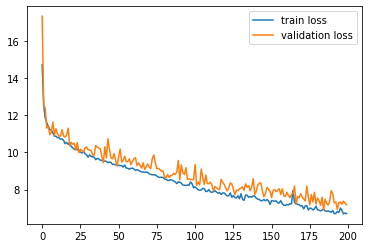

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot([i for i in range(len(loss))],loss)
plt.plot([i for i in range(len(val_loss))],val_loss)
plt.legend(['train loss','validation loss'])

In [27]:
scores = model.evaluate(X_test, Y_test)
print("TEST MAPE :",scores[0])

176/176 [==============================] - 0s 2ms/step - loss: 6.8611 - accuracy: 0.0000e+00
TEST MAPE : 6.8611345291137695


In [28]:
scores

[6.8611345291137695, 0.0]

In [29]:
def give_daily_demand(df,y):
    '''
    It returns the daily load demand vs hour for a specific year.
    
    df = dataframe
    y = year
    
    '''
    monthDict={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
    dfx = df.loc[df.year==y]

    for i,m in enumerate(set(dfx.month)):
        if m in set(dfx.month):
            dfxx = dfx.loc[dfx.month==m]
            #print(monthDict[m],end=' ')
            for d in range(1,31):
                if d in set(dfxx.day):
                    #print(d)
                    dfxxx = dfxx.loc[dfxx.day==d]
                    ttl = str('Year: '+str(y)+' Month: '+str(monthDict[m])+' '+str(d))
                    #plt.figure(ttl)
                    #plt.plot(dfxxx.hour,dfxxx.demand)
                    #print(dfxxx)
                    #plt.title(ttl)
        return dfxxx,ttl

In [30]:
dfxxx,ttl = give_daily_demand(df_master,2020)
print(dfxxx)

            year  month  day  weekday  hour  demand
date                                               
2020-01-30  2020      1   30        5     0  7000.0
2020-01-30  2020      1   30        5     1  6508.0
2020-01-30  2020      1   30        5     2  6176.0
2020-01-30  2020      1   30        5     3  5969.0
2020-01-30  2020      1   30        5     4  5838.0
2020-01-30  2020      1   30        5     5  5792.0
2020-01-30  2020      1   30        5     6  6090.0
2020-01-30  2020      1   30        5     7  6721.0
2020-01-30  2020      1   30        5     8  7259.0
2020-01-30  2020      1   30        5     9  7608.0
2020-01-30  2020      1   30        5    10  7677.0
2020-01-30  2020      1   30        5    11  7637.0
2020-01-30  2020      1   30        5    12  7827.0
2020-01-30  2020      1   30        5    13  7756.0
2020-01-30  2020      1   30        5    14  7339.0
2020-01-30  2020      1   30        5    15  7235.0
2020-01-30  2020      1   30        5    16  7109.0
2020-01-30  

In [31]:
test_y = []
true_y = []
for i in range(48,24*3):
    test = X[i]
    true_y.append(Y[i]*D_max)
    test = test.reshape(1,1,5)
    y = model.predict(test)
    test_y.append(y[0][0]*D_max)

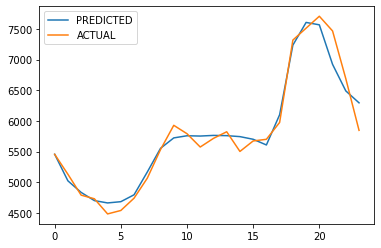

In [32]:
plt.plot(test_y)
plt.plot(true_y)
plt.legend(['PREDICTED','ACTUAL'])

In [33]:
y_pred=model.predict(X_test)
y_pred.shape
# Y_test.shape
y_pred.shape
Y_test.shape

(5616,)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
y_pred.shape
Y_test.shape

(5616,)

In [ ]:
# Y_test=Y_test.reshape(5616,1)

In [36]:
X_test.shape

(5616, 1, 5)

In [37]:
y_pred=model.predict(X_test)
y_pred.shape

(5616, 1)

In [38]:
Y_test=Y_test.reshape(5616,1)
Y_test.shape


(5616, 1)

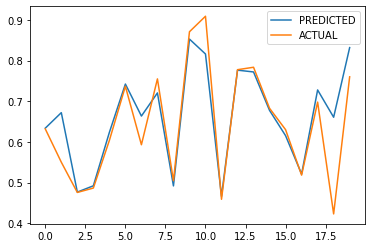

In [39]:
plt.plot(y_pred[0:20,0])
plt.plot(Y_test[0:20,0])
plt.legend(['PREDICTED','ACTUAL'])

In [ ]:
# define LSTM
# model = Sequential()
# model.add(LSTM(80, input_shape=(1,5),kernel_initializer='uniform', return_sequences=True)) #input shape (1,5) to (1,6)
# model.add(LSTM(80,kernel_initializer='uniform', activation='selu', return_sequences=True))
# model.add(LSTM(80, activation='selu'))
# model.add(Dropout(0.05, input_shape=(80,)))
# model.add(Dense(20, activation='selu'))
# model.add(Dense(1, activation='selu'))
# opt = Adam(learning_rate=0.005)
# model.compile(loss='mean_absolute_percentage_error', optimizer=opt, metrics=['accuracy'])

In [40]:
nsamples, nx, ny = X_train.shape
d2_train_dataset = X_train.reshape((nsamples,nx*ny))

In [41]:
from sklearn.ensemble import RandomForestRegressor
cls = RandomForestRegressor(n_estimators=1)
cls.fit(d2_train_dataset,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [42]:
nsamples, nx, ny = X_test.shape
d2_test_dataset = X_test.reshape((nsamples,nx*ny))

In [43]:
sk_pred=cls.predict(d2_test_dataset)

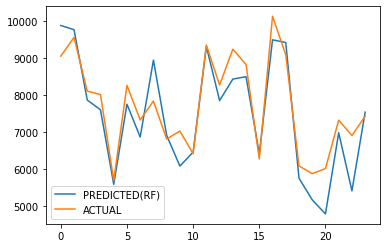

In [44]:
plt.plot(sk_pred[48:24*3]*D_max)
plt.plot(Y_test[48:24*3]*D_max)
plt.legend(['PREDICTED(RF)','ACTUAL'])

In [45]:
cls.feature_importances_

array([0.14317967, 0.15746958, 0.09909369, 0.26976954, 0.33048752])

In [46]:
importance = cls.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.14318
Feature: 1, Score: 0.15747
Feature: 2, Score: 0.09909
Feature: 3, Score: 0.26977
Feature: 4, Score: 0.33049


In [47]:
importance.shape

(5,)

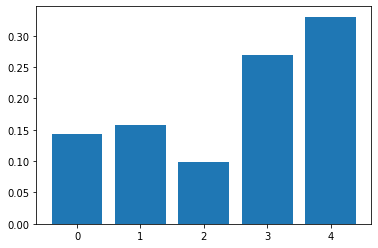

In [48]:
from matplotlib import pyplot
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [49]:
cls.feature_importances_

array([0.14317967, 0.15746958, 0.09909369, 0.26976954, 0.33048752])

In [50]:
import sklearn.metrics
from sklearn.metrics import mean_squared_error

In [88]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [89]:
MAPE_RF=mean_absolute_percentage_error(Y_test,sk_pred)
MAPE_RF

8.929044412055642

In [90]:
cls.score(d2_test_dataset,Y_test)

0.6075354177919019

In [91]:
def LSTM_MAEP_RMSE(month,year):
  year_dict = {2018: 1, 2019: 2, 2020: 3}

  month_seq = {
      "jan": 1,
      "feb": 2,
      "mar": 3,
      "apr": 4,
      "may": 5,
      "jun": 6,
      "jul": 7,
      "aug": 8,
      "sep": 9,
      "oct": 10,
      "nov": 11,
      "dec": 12,
  }

  month_dict = {
      "jan": (0, 31),
      "feb": (31, 59),
      "mar": (59, 90),
      "apr": (90, 120),
      "may": (120, 151),
      "jun": (151, 181),
      "jul": (181, 212),
      "aug": (212, 243),
      "sep": (243, 273),
      "oct": (273, 304),
      "nov": (304, 334),
      "dec": (334, 365)
  } 

  st = year_dict[year]*365+(month_dict[month][0] + (1 if year == 2020 and month_seq[month] > 2 else 0))*24
  en = year_dict[year]*365+(month_dict[month][1] + (1 if year == 2020 and month_seq[month] >= 2 else 0))*24
  test_y_jan = []
  true_y_jan = []
  for i in range(st, en):
      test = X[i]
      true_y_jan.append(Y[i])
      test = test.reshape(1,1,5)
      y = model.predict(test)
      test_y_jan.append(y[0][0])
  return mean_absolute_percentage_error(true_y_jan,test_y_jan),mean_squared_error(true_y_jan,test_y_jan)

In [92]:
def RF_MAPE_RMSE(month,year):
  year_dict = {2018: 1, 2019: 2, 2020: 3}

  month_seq = {
      "jan": 1,
      "feb": 2,
      "mar": 3,
      "apr": 4,
      "may": 5,
      "jun": 6,
      "jul": 7,
      "aug": 8,
      "sep": 9,
      "oct": 10,
      "nov": 11,
      "dec": 12,
  }

  month_dict = {
      "jan": (0, 31),
      "feb": (31, 59),
      "mar": (59, 90),
      "apr": (90, 120),
      "may": (120, 151),
      "jun": (151, 181),
      "jul": (181, 212),
      "aug": (212, 243),
      "sep": (243, 273),
      "oct": (273, 304),
      "nov": (304, 334),
      "dec": (334, 365)
  } 

  st = year_dict[year]*365+(month_dict[month][0] + (1 if year == 2020 and month_seq[month] > 2 else 0))*24
  en = year_dict[year]*365+(month_dict[month][1] + (1 if year == 2020 and month_seq[month] >= 2 else 0))*24
  test_y_jan = []
  true_y_jan = []
  for i in range(st, en):
    test = X[i]
    true_y_jan.append(Y[i])
    test = test.reshape(1,1*5)
    y = cls.predict(test)
    test_y_jan.append(y[0])
  return mean_absolute_percentage_error(true_y_jan,test_y_jan),mean_squared_error(true_y_jan,test_y_jan)

In [95]:
JANUARY_LSTM_MAPE,JANUARY_LSTM_RSME=LSTM_MAEP_RMSE("jan",2019)
JUNE_LSTM_MAPE,JUNEY_LSTM_RSME=LSTM_MAEP_RMSE("jun",2019)
DECEMBER_LSTM_MAPE,DECEMBER_LSTM_RSME=LSTM_MAEP_RMSE("dec",2019)

In [96]:
print(JANUARY_LSTM_MAPE,JANUARY_LSTM_RSME)
print(JUNE_LSTM_MAPE,JUNEY_LSTM_RSME)
print(DECEMBER_LSTM_MAPE,DECEMBER_LSTM_RSME)

5.497941527329733 0.0013937262435878936
6.100117025060992 0.002822189236742747
3.327869316809689 0.0005264800659336858


In [93]:
JANUARY_RF_MAPE,JANUARY_RF_RSME=RF_MAPE_RMSE("jan",2019)
JUNE_RF_MAPE,JUNEY_RF_RSME=RF_MAPE_RMSE("jun",2019)
DECEMBER_RF_MAPE,DECEMBER_RF_RSME=RF_MAPE_RMSE("dec",2019)

In [94]:
print(JANUARY_RF_MAPE,JANUARY_RF_RSME)
print(JUNE_RF_MAPE,JUNEY_RF_RSME)
print(DECEMBER_RF_MAPE,DECEMBER_RF_RSME)

5.131196718650135 0.0019224458709516294
5.428019465663703 0.004193559574948023
2.927525489703794 0.0005850969778258638


In [80]:
def LSTM_MONTH_PLOT(month,year):

  year_dict = {2018: 1, 2019: 2, 2020: 3}

  month_seq = {
      "jan": 1,
      "feb": 2,
      "mar": 3,
      "apr": 4,
      "may": 5,
      "jun": 6,
      "jul": 7,
      "aug": 8,
      "sep": 9,
      "oct": 10,
      "nov": 11,
      "dec": 12,
  }

  month_dict = {
      "jan": (0, 31),
      "feb": (31, 59),
      "mar": (59, 90),
      "apr": (90, 120),
      "may": (120, 151),
      "jun": (151, 181),
      "jul": (181, 212),
      "aug": (212, 243),
      "sep": (243, 273),
      "oct": (273, 304),
      "nov": (304, 334),
      "dec": (334, 365)
  } 

  st = year_dict[year]*365+(month_dict[month][0] + (1 if year == 2020 and month_seq[month] > 2 else 0))*24
  en = year_dict[year]*365+(month_dict[month][1] + (1 if year == 2020 and month_seq[month] >= 2 else 0))*24
  test_y = []
  true_y = []
  for i in range(st, en):
      test = X[i]
      true_y.append(Y[i]*D_max)
      test = test.reshape(1,1,5)
      y = model.predict(test)
      test_y.append(y[0][0]*D_max)
  plt.plot(true_y)
  plt.plot(test_y)
  plt.suptitle(f"{month} Month prediction comparison")
  plt.legend(["ACTUAL", "LSTM PREDICTION"])

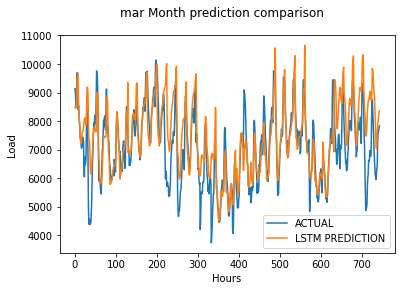

In [81]:
LSTM_MONTH_PLOT("mar", 2020)